<a href="https://colab.research.google.com/github/ukishore33/Building-Machine-learning-pipeline-start-up-acquisition-dataset/blob/main/Startup_Dataset_Task_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import datetime
from sklearn import preprocessing

## Reading Dataset

In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/Data Science Projects/Violavizn/companies_cleaned.csv')

## Feauture Engineering

### Feature selection

#### Correlation Matrix with Heatmap

<ipython-input-4-480d207442ce>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df=df_train.corr()


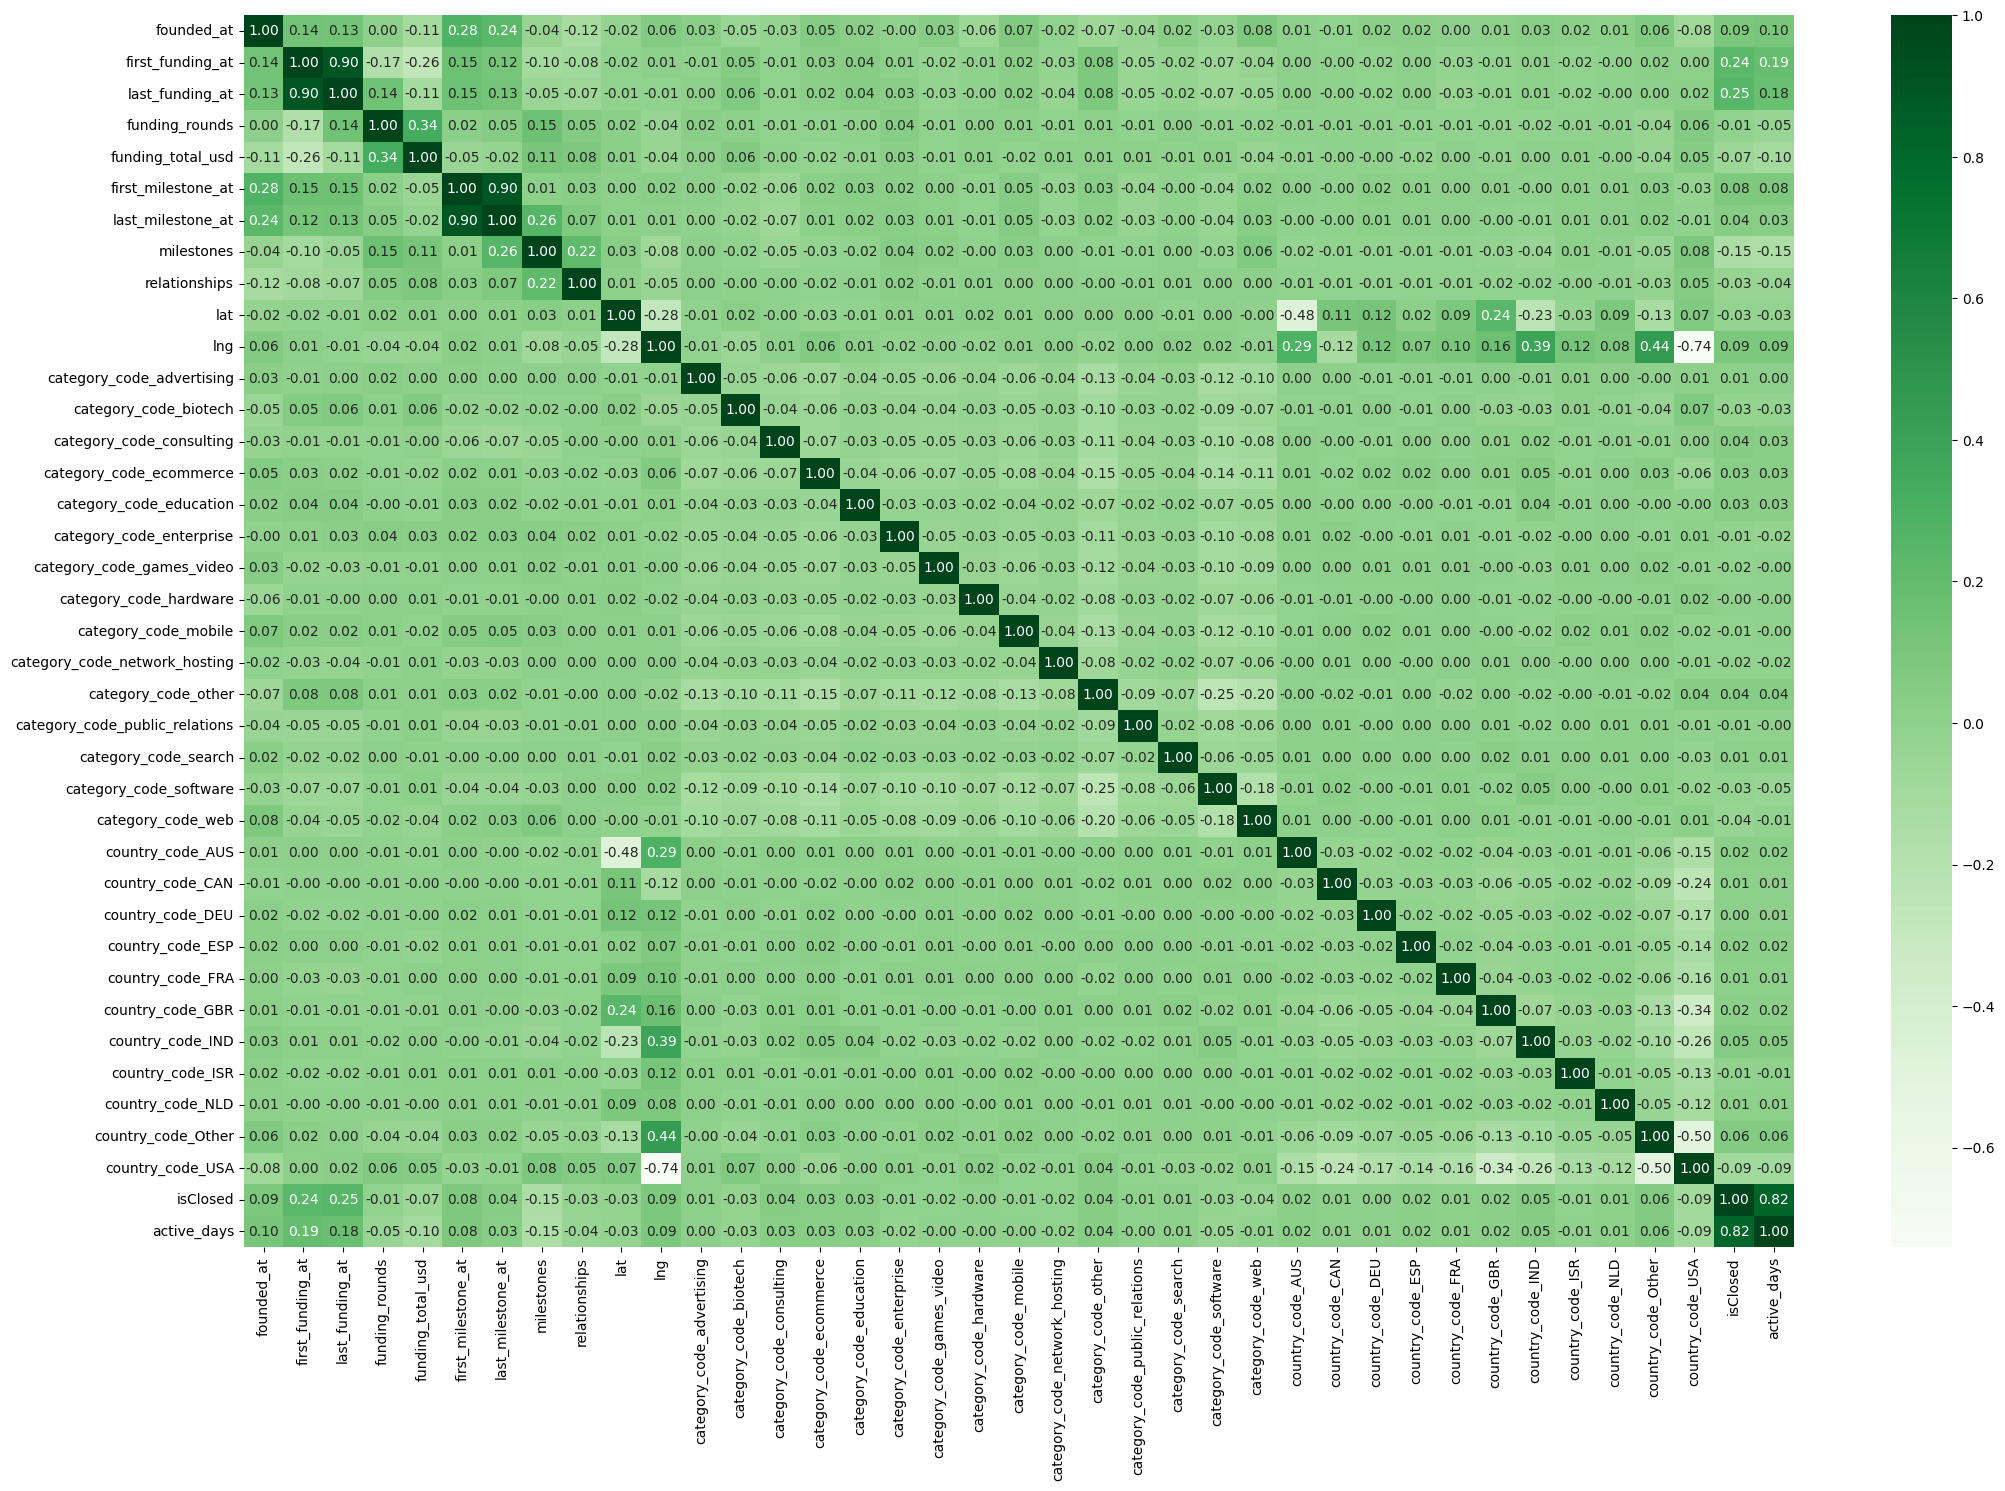

In [ ]:
corr_df=df_train.corr()
plt.figure(figsize = (25,16))
sns.heatmap(data = corr_df, annot = True, cmap = "Greens", cbar = True, fmt='.2f')
plt.show()

### Mutual Information

The metric we'll use is called "mutual information". Mutual information is a lot like correlation in that it measures a relationship between two quantities. The advantage of mutual information is that it can detect any kind of relationship, while correlation only detects linear relationships.

In [ ]:
x=df_train.drop('status',axis=1)
y=df_train['status']

In [ ]:
# Encode categorical variables
categorical_cols = df_train.select_dtypes(include=['object']).columns
X_encoded = df_train.copy()

In [ ]:
for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(df_train[col])


In [ ]:
# Calculate mutual information scores for each feature
mi_scores = mutual_info_classif(X_encoded, y, random_state=42)

In [ ]:
# Create a DataFrame to see the scores for each feature
mi_scores_df = pd.DataFrame({'Feature': df_train.columns, 'Mutual_Information_Score': mi_scores})
mi_scores_df.sort_values(by='Mutual_Information_Score', ascending=False, inplace=True)

# Print the scores
print(mi_scores_df)

                           Feature  Mutual_Information_Score
0                           status                  0.297046
38                        isClosed                  0.296804
39                     active_days                  0.265473
3                  last_funding_at                  0.039731
2                 first_funding_at                  0.037912
5                funding_total_usd                  0.017830
1                       founded_at                  0.016985
4                   funding_rounds                  0.015640
6               first_milestone_at                  0.015286
37                country_code_USA                  0.013518
8                       milestones                  0.013319
11                             lng                  0.011081
10                             lat                  0.010724
9                    relationships                  0.007667
7                last_milestone_at                  0.007334
22             category_

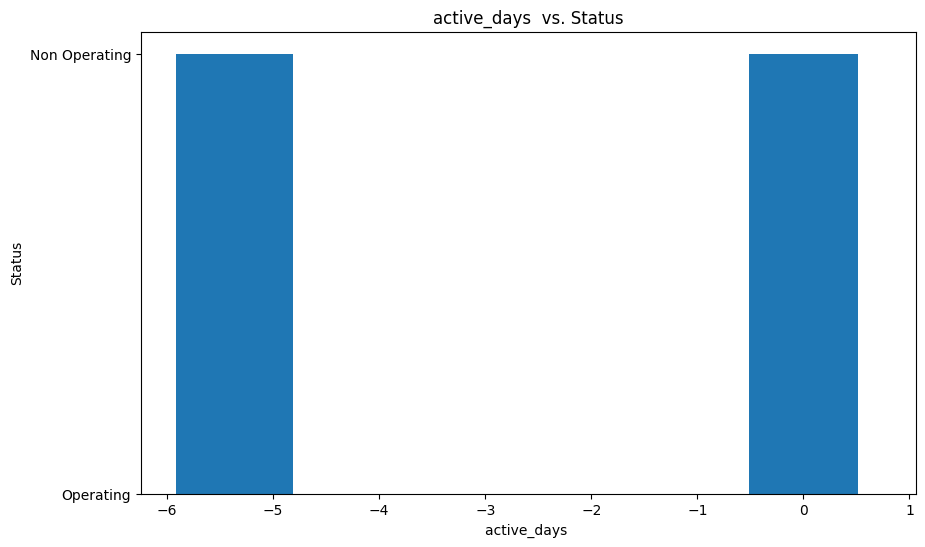

In [ ]:
# Feature 1: Active Duration Categories vs. Status
plt.figure(figsize=(10, 6))
plt.bar(df_train['active_days'], df_train['status'])
plt.xlabel('active_days ')
plt.ylabel('Status')
plt.title('active_days  vs. Status')
plt.show()

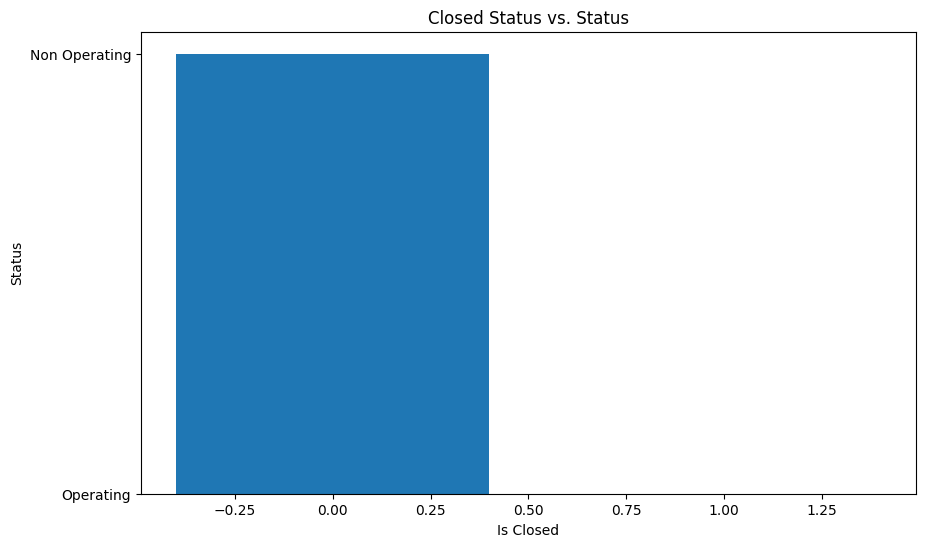

In [ ]:
# Feature 3: Closed Status vs. Status
plt.figure(figsize=(10, 6))
plt.bar(df_train['isClosed'], df_train['status'])
plt.xlabel('Is Closed')
plt.ylabel('Status')
plt.title('Closed Status vs. Status')
plt.show()

### Adding Other Features Helpfull in predicting the Target Varible (Status)

In [ ]:
# Feature 1: Funding per Milestone
df_train['funding_per_milestone'] = df_train['funding_total_usd'] / df_train['milestones']

# Feature 2: Funding per Relationship
df_train['funding_per_relationship'] = df_train['funding_total_usd'] / df_train['relationships']

# Feature 3: Funding per Round
df_train['funding_per_round'] = df_train['funding_total_usd'] / df_train['funding_rounds']

In [ ]:
# Time between First and the Last Fnding
df_train['last_funding_at'] = pd.to_datetime(df_train['last_funding_at'])
df_train['first_funding_at'] = pd.to_datetime(df_train['first_funding_at'])

# Now  calculate the duration
df_train['funding_duration'] = (df_train['last_funding_at'] - df_train['first_funding_at']).dt.days


In [ ]:
df_train['founded_at'] = pd.to_datetime(df_train['founded_at'])

#data2['milestone_density'] = data2['milestones'] / (datetime.now().year - data2['founded_at'].dt.year)


In [ ]:
df_train['funding_per_milestone'] = df_train['funding_total_usd'] / df_train['milestones']
df_train['funding_per_relationship'] = df_train['funding_total_usd'] / df_train['relationships']


In [ ]:
df_train['last_milestone_at'] = pd.to_datetime(df_train['last_milestone_at'])

# Now the time since the last milestone
#data2['time_since_last_milestone'] = (datetime.now() - data2['last_milestone_at']).dt.days

In [ ]:
# Selecting only numeric columns
numeric_columns = df_train.select_dtypes(include=['number'])

# Removing the target variable 'status' if it exists in the DataFrame
if 'status' in numeric_columns:
    numeric_columns = numeric_columns.drop(['status'], axis=1)

# Applying k-means clustering
from sklearn.cluster import KMeans

k_clusters = 3
kmeans = KMeans(n_clusters=k_clusters, random_state=42)
df_train['cluster'] = kmeans.fit_predict(numeric_columns)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### PCA

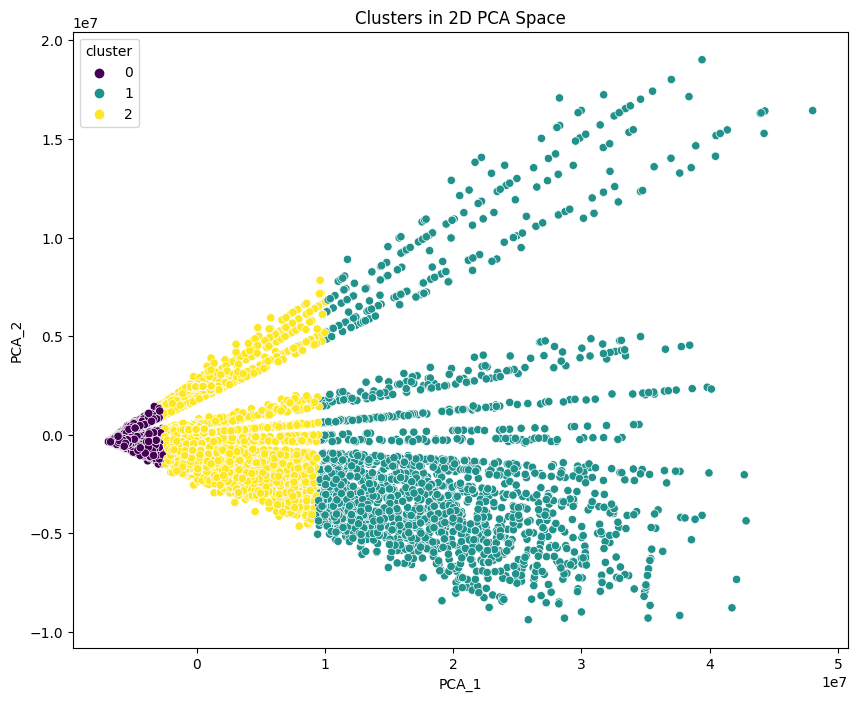

In [ ]:
# Assuming 'df' is your DataFrame
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(numeric_columns)

# Create a DataFrame for the PCA results
pca_data2 = pd.DataFrame(data=X_pca, columns=['PCA_1', 'PCA_2'])

# Concatenate the cluster labels with PCA results
pca_data2['cluster'] = df_train['cluster']

# Plotting the clusters in 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA_1', y='PCA_2', hue='cluster', data=pca_data2, palette='viridis', legend='full')
plt.title('Clusters in 2D PCA Space')
plt.show()

### Standardisation



In [ ]:
from sklearn import preprocessing
scalar=preprocessing.StandardScaler()
x=scalar.fit_transform(x)